In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_sel_240307_treefit/'
base_file_loc = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_sel_240310_treefit/'
base_file_loc = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v0_looseeta_240317_treefit_BCS/'
base_file_loc = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v1_240405_treefit_BCS_etapi0const/'


In [5]:
generic_ccbar = base_file_loc + 'ccbar/*.root'

generic_uubar = base_file_loc + 'uubar/*.root'
generic_ddbar = base_file_loc + 'ddbar/*.root'
generic_ssbar = base_file_loc + 'ssbar/*.root'
generic_charged = base_file_loc + 'charged/*.root'
generic_mixed = base_file_loc + 'mixed/*.root'
generic_taupair = base_file_loc + 'taupair/*.root'

In [6]:
base_filter='D0_M>0'
base_filter='etaeta_pipi_rank==1'

# base_filter += ' && ((pipi_eta_pi01_g1_clusterReg==1 && pipi_eta_pi01_g1_E>0.05) || (pipi_eta_pi01_g1_clusterReg==3 && pipi_eta_pi01_g1_E>0.075) || (pipi_eta_pi01_g1_clusterReg==2 && pipi_eta_pi01_g1_E>0.05))'
# base_filter += ' && ((pipi_eta_pi01_g2_clusterReg==1 && pipi_eta_pi01_g2_E>0.05) || (pipi_eta_pi01_g2_clusterReg==3 && pipi_eta_pi01_g2_E>0.075) || (pipi_eta_pi01_g2_clusterReg==2 && pipi_eta_pi01_g2_E>0.05))'
# base_filter += ' && ((pipi_eta_pi02_g1_clusterReg==1 && pipi_eta_pi02_g1_E>0.05) || (pipi_eta_pi02_g1_clusterReg==3 && pipi_eta_pi02_g1_E>0.075) || (pipi_eta_pi02_g1_clusterReg==2 && pipi_eta_pi02_g1_E>0.05))'
# base_filter += ' && ((pipi_eta_pi02_g2_clusterReg==1 && pipi_eta_pi02_g2_E>0.05) || (pipi_eta_pi02_g2_clusterReg==3 && pipi_eta_pi02_g2_E>0.075) || (pipi_eta_pi02_g2_clusterReg==2 && pipi_eta_pi02_g2_E>0.05))'

In [7]:
tree = 'etaeta_pipi_tag'
variables = ["__experiment__", "__run__", "__event__",\
             "D0_M","D0_isSignal","Dstarp_delM","Dstarp_CMS_p","Dstarp_isSignal",\
             "Dstarp_cosAngleBetweenMomentumAndVertexVector","Dstarp_cosAngleBetweenMomentumAndVertexVectorInXYPlane",\
             "D0_cosAngleBetweenMomentumAndVertexVector","D0_cosAngleBetweenMomentumAndVertexVectorInXYPlane",\
             "Eta_1_isSignal", "Eta_1_M","Eta_1_p","Eta_1_isSignal",\
             "Eta_2_isSignal", "Eta_2_M","Eta_2_p","Eta_2_isSignal",\
             "pipi_eta1_Pi0_M","pipi_eta1_Pi0_Easym","pipi_eta1_Pi0_daughterDiffOfPhi_0_1","pipi_eta1_Pi0_daughterAngle_0_1",\
             "pipi_eta2_Pi0_M","pipi_eta2_Pi0_Easym","pipi_eta2_Pi0_daughterDiffOfPhi_0_1","pipi_eta2_Pi0_daughterAngle_0_1",\
             #"gamma1_E","gamma1_clusterNHits","gamma1_clusterReg",\
             #"gamma2_E","gamma2_clusterNHits","gamma2_clusterReg",\
             #"dM_pi0","ROE_Mgg",'veto_isSignal',\
             #"dM_pi0_50MeV","ROE_Mgg_50MeV",'veto_isSignal_50MeV',\
             #"dM_pi0_75MeV","ROE_Mgg_75MeV",'veto_isSignal_75MeV',\
             #"dM_pi0_75MeV_2","ROE_Mgg_75MeV_2",'veto_isSignal_75MeV_2',\
             "Pis_dr","Pis_dz"
            ]

In [8]:
pd_ccbar_0 = get_pd(file=generic_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_uubar_0 = get_pd(file=generic_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_ddbar_0 = get_pd(file=generic_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar_0 = get_pd(file=generic_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_charged_0 = get_pd(file=generic_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_mixed_0 = get_pd(file=generic_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_taupair_0 = get_pd(file=generic_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [9]:
pd_ccbar = pd_ccbar_0.reset_index(drop=True)
pd_uubar = pd_uubar_0.reset_index(drop=True)
pd_ddbar = pd_ddbar_0.reset_index(drop=True)
pd_ssbar = pd_ssbar_0.reset_index(drop=True)
pd_charged = pd_charged_0.reset_index(drop=True)
pd_mixed = pd_mixed_0.reset_index(drop=True)
pd_taupair = pd_taupair_0.reset_index(drop=True)

In [10]:
numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

9891
9892
0.9998989082086535


In [11]:
cut = 'D0_M>0.0'
# cut += ' & abs(pipi_eta1_Pi0_daughterDiffOfPhi_0_1)<1.5 & pipi_eta1_Pi0_daughterAngle_0_1<1.4  & abs(pipi_eta2_Pi0_daughterDiffOfPhi_0_1)<1.5 & pipi_eta2_Pi0_daughterAngle_0_1<1.4'
# cut += ' & pipi_eta1_Pi0_M>0.120 & pipi_eta1_Pi0_M<0.145 & pipi_eta2_Pi0_M>0.120 & pipi_eta2_Pi0_M<0.145'
# cut += ' & Eta_1_M>0.53 &  Eta_1_M<0.56 & Eta_2_M>0.53 &  Eta_2_M<0.56'

# cut += '& abs(Eta_1_daughterDiffOfPhi_0_1)<2. & Eta_1_daughterAngle_0_1<1.7 & abs(Eta_2_daughterDiffOfPhi_0_1)<2. & Eta_2_daughterAngle_0_1<1.7'
# cut += '& dM_pi0_75MeV>0.012'
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

In [12]:
plot_directory = "/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_generic/D0etaeta_pipi_tag"
plot_directory = "/media/jykim/T7/saved_plots/DRAW/etaeta/MC15ri_generic/pipi"

# plot_directory = os.path.dirname(file_path)
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

In [13]:
var = 'D0_M'
xrange=(0,1)
nbins=50
img_path=''
xlabel=''
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
luminosity=r"$1000\; \mathrm{fb}^{-1}$"

In [14]:
def wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path,force_range=tuple(),unit="[GeV/c^2]"):
    data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
    labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
    MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit=unit,luminosity=luminosity,force_range=force_range)
    plt.tight_layout()

    plt.savefig(img_path)

[382. 373. 390. 332. 342. 310. 288. 267. 290. 260. 236. 223. 215. 195.
 204. 217. 172. 160. 194. 178. 182. 177. 157. 185. 219. 498. 788. 334.
 162. 129. 126. 139. 109. 124.  95. 107.  99. 105.  81.  89.  68.  95.
  72.  70.  86.  71.  77.  81.  72.  67.]
fitst_bin_entries=382.0


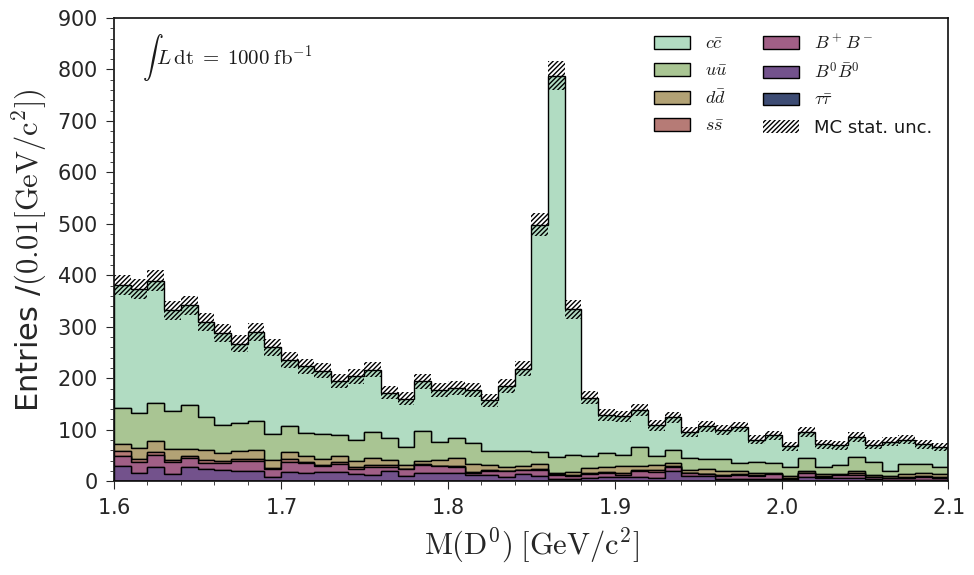

In [19]:
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.6,2.1)
nbins = 50
xlabel = "$\mathrm{M(D^0)}$"
#
# img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tag_pre_sel_D0M_step0.png"
img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tight_selv1_sel_D0M.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[ 45.  55.  86.  90. 102. 120. 120. 157. 124. 138. 186. 211. 345. 873.
 445. 223. 196. 183. 200. 185. 192. 192. 192. 168. 175. 198. 160. 199.
 185. 180. 195. 192. 192. 182. 172. 171. 161. 188. 202. 212. 193. 191.
 204. 209. 217. 189. 223. 212. 219. 216.]
fitst_bin_entries=45.0


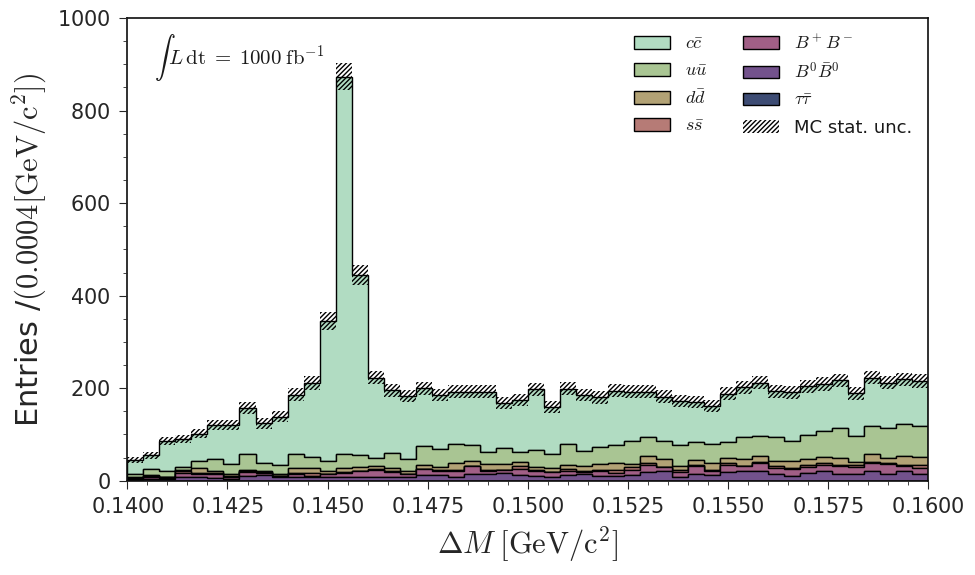

In [20]:
var = 'Dstarp_delM'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0.140,0.16)
nbins = 50
xlabel = "$\Delta M$"

# img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tag_pre_sel_Dstarp_delM_step0.png"
img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tight_selv1_sel_delM.png"

# img_path = plot_directory + "/test.png"
# plt.xticks(fontsize=12)

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

In [147]:
cut = 'D0_M>0.0'
# cut += ' & abs(pipi_eta1_Pi0_daughterDiffOfPhi_0_1)<1.5 & pipi_eta1_Pi0_daughterAngle_0_1<1.4  & abs(pipi_eta2_Pi0_daughterDiffOfPhi_0_1)<1.5 & pipi_eta2_Pi0_daughterAngle_0_1<1.4'
cut += ' & pipi_eta1_Pi0_M>0.120 & pipi_eta2_Pi0_M>0.120 & abs(pipi_eta1_Pi0_daughterDiffOfPhi_0_1)<1.5 & pipi_eta1_Pi0_daughterAngle_0_1<1.4 & abs(pipi_eta2_Pi0_daughterDiffOfPhi_0_1)<1.5 & pipi_eta2_Pi0_daughterAngle_0_1<1.4'
# cut += ' & Eta_1_M>0.53 &  Eta_1_M<0.56 & Eta_2_M>0.53 &  Eta_2_M<0.56'

# cut += '& abs(Eta_1_daughterDiffOfPhi_0_1)<2. & Eta_1_daughterAngle_0_1<1.7 & abs(Eta_2_daughterDiffOfPhi_0_1)<2. & Eta_2_daughterAngle_0_1<1.7'
# cut += '& dM_pi0_75MeV>0.012'
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[4026. 3829. 3666. 3581. 3439. 3209. 3040. 2887. 2970. 2784. 2662. 2484.
 2381. 2292. 2186. 2192. 2114. 2034. 2017. 1915. 1842. 1841. 1818. 1869.
 1945. 1934. 1886. 1678. 1511. 1402. 1404. 1268. 1200. 1064. 1147. 1065.
  992.  961.  939.  884.  857.  820.  793.  787.  772.  774.  682.  678.
  710.  699.]
fitst_bin_entries=4026.0


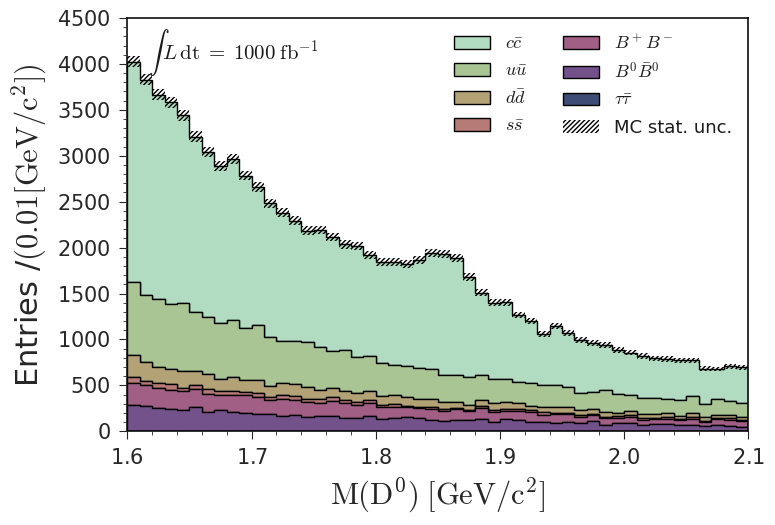

In [148]:
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.6,2.1)
nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tag_pre_sel_D0M_step1.png"
# img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tight_selv0_sel_D0M.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[ 600.  698.  874.  970. 1101. 1247. 1289. 1435. 1480. 1578. 1694. 1810.
 2138. 2606. 2264. 2021. 1921. 1890. 1998. 1941. 1924. 1906. 1870. 1942.
 1885. 1917. 1879. 1887. 1932. 1918. 2050. 1964. 2000. 2051. 1961. 2055.
 1978. 2011. 1980. 2036. 2028. 2111. 2139. 2123. 2098. 2155. 2058. 2028.
 2030. 2120.]
fitst_bin_entries=600.0


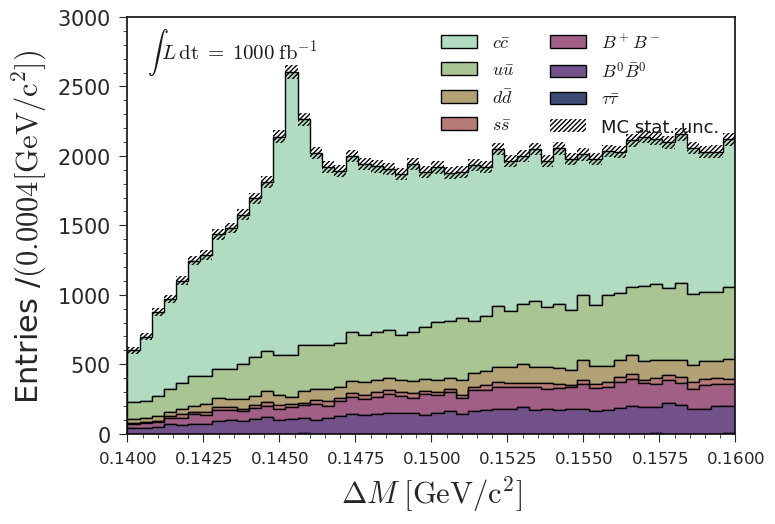

In [149]:
var = 'Dstarp_delM'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0.140,0.16)
nbins = 50
xlabel = "$\Delta M$"

img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tag_pre_sel_Dstarp_delM_step1.png"
# img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tight_selv0_sel_delM.png"

# img_path = plot_directory + "/test.png"
plt.xticks(fontsize=12)
wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

In [150]:
cut = 'D0_M>0.0'
# cut += ' & abs(pipi_eta1_Pi0_daughterDiffOfPhi_0_1)<1.5 & pipi_eta1_Pi0_daughterAngle_0_1<1.4  & abs(pipi_eta2_Pi0_daughterDiffOfPhi_0_1)<1.5 & pipi_eta2_Pi0_daughterAngle_0_1<1.4'
# cut += ' & pipi_eta1_Pi0_M>0.120 & pipi_eta2_Pi0_M>0.120 & abs(pipi_eta1_Pi0_daughterDiffOfPhi_0_1)<1.5 & pipi_eta1_Pi0_daughterAngle_0_1<1.4'
cut += ' & Eta_1_M>0.53 &  Eta_1_M<0.56 & Eta_2_M>0.53 &  Eta_2_M<0.56'
# cut += ' & Eta_1_p>0.4 & Eta_2_p>0.4'
# cut += '& abs(Eta_1_daughterDiffOfPhi_0_1)<2. & Eta_1_daughterAngle_0_1<1.7 & abs(Eta_2_daughterDiffOfPhi_0_1)<2. & Eta_2_daughterAngle_0_1<1.7'
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[1120. 1112. 1041. 1050. 1032.  928.  959.  800.  937.  806.  787.  765.
  728.  710.  651.  671.  637.  624.  602.  554.  575.  606.  596.  664.
  810.  838.  844.  637.  494.  460.  446.  393.  364.  310.  368.  313.
  314.  303.  309.  272.  263.  236.  251.  231.  242.  230.  196.  191.
  201.  195.]
fitst_bin_entries=1120.0


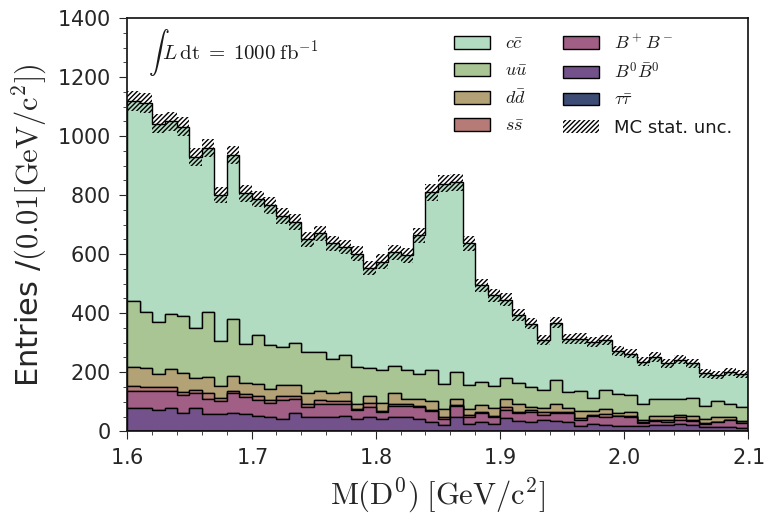

In [151]:
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.6,2.1)
nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tag_pre_sel_D0M_step2.png"
# img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tight_selv0_sel_D0M.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[ 184.  210.  277.  263.  343.  366.  381.  442.  446.  505.  533.  616.
  839. 1275.  976.  694.  632.  595.  640.  589.  592.  586.  564.  585.
  543.  545.  552.  542.  572.  573.  612.  592.  594.  624.  583.  624.
  568.  571.  577.  589.  644.  625.  611.  598.  601.  685.  593.  581.
  625.  616.]
fitst_bin_entries=184.0


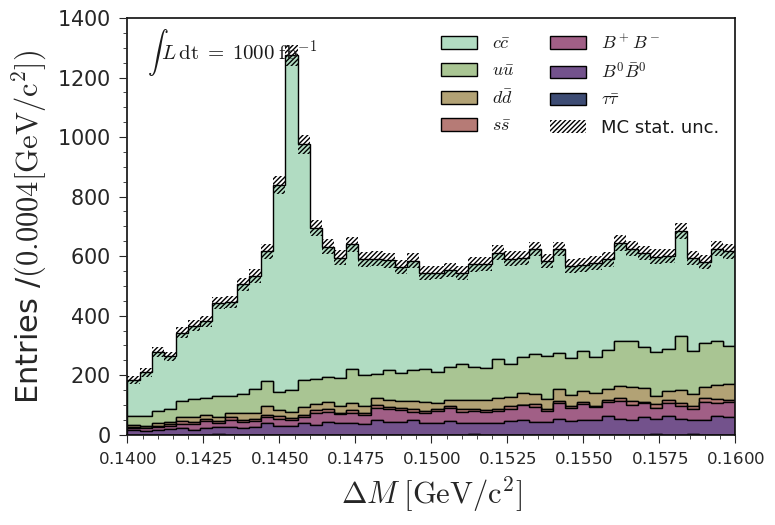

In [152]:
var = 'Dstarp_delM'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0.140,0.16)
nbins = 50
xlabel = "$\Delta M$"

img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tag_pre_sel_Dstarp_delM_step2.png"
# img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tight_selv0_sel_delM.png"

# img_path = plot_directory + "/test.png"
plt.xticks(fontsize=12)
# plt.ylim(0,1600)
wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[789. 775. 763. 715. 770. 800. 703. 839. 707. 782. 744. 760. 766. 769.
 873. 761. 757. 772. 742. 750. 725. 765. 705. 718. 722. 732. 698. 710.
 623. 692. 614. 604. 585. 586. 476. 535. 484. 465. 382. 393. 308. 246.
 225. 176.  90.  58.  12.   0.   0.   0.]
fitst_bin_entries=789.0


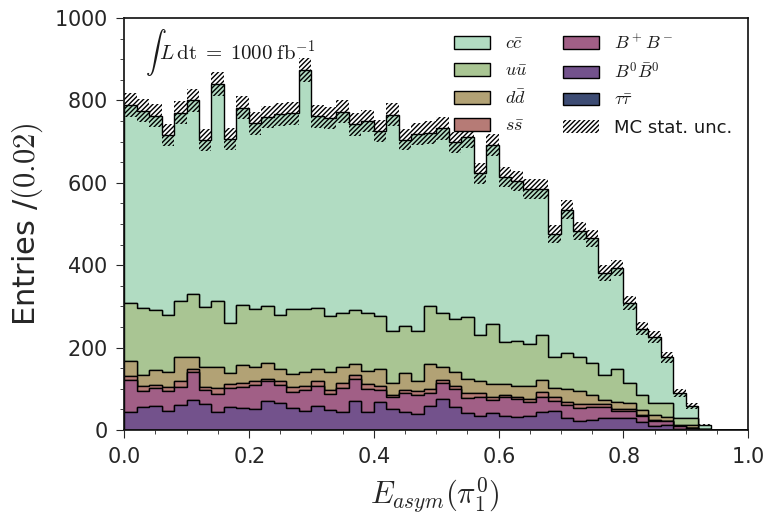

In [153]:
var = 'pipi_eta1_Pi0_Easym'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0,1)
nbins = 50
xlabel = "$E_{asym}(\pi^0_1)$ "

img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tag_pre_sel_Pi01_Easym_step2.png"
# img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tight_selv0_sel_D0M.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path,unit="")

[716. 748. 812. 787. 740. 767. 793. 817. 787. 759. 720. 757. 773. 724.
 679. 793. 731. 671. 715. 693. 734. 780. 706. 681. 645. 690. 706. 672.
 705. 714. 655. 654. 651. 599. 563. 518. 520. 450. 445. 352. 309. 278.
 234. 209. 137.  49.  26.   2.   0.   0.]
fitst_bin_entries=716.0


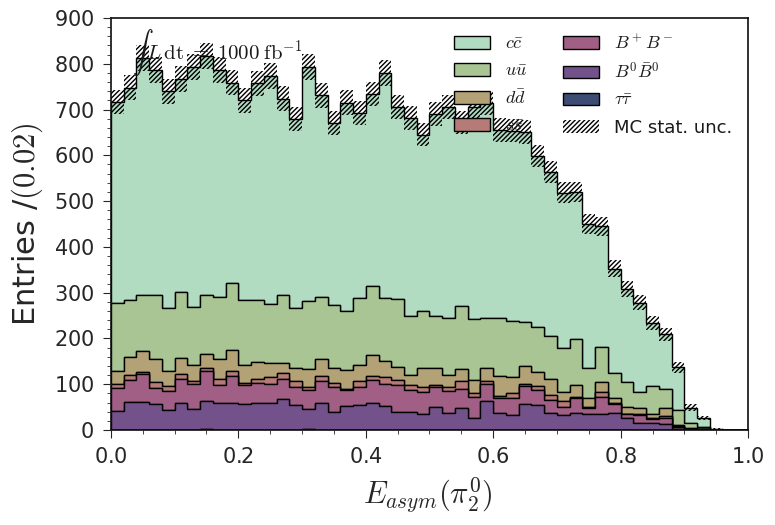

In [154]:
var = 'pipi_eta2_Pi0_Easym'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0,1)
nbins = 50
xlabel = "$E_{asym}(\pi^0_2)$ "

img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tag_pre_sel_Pi02_Easym_step2.png"
# img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tight_selv0_sel_D0M.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path,unit="")

[   5.   85.  315.  518.  718.  948.  984. 1002. 1029. 1096. 1033. 1096.
 1074. 1100. 1210. 1260. 1231. 1366. 1521. 1482. 1353. 1299. 1089. 1034.
  862.  784.  622.  583.  444.  327.  270.  200.  156.  130.  120.   96.
   74.   48.   36.   19.   14.    4.    5.    5.    7.    5.    0.    3.
    0.    3.]
fitst_bin_entries=5.0


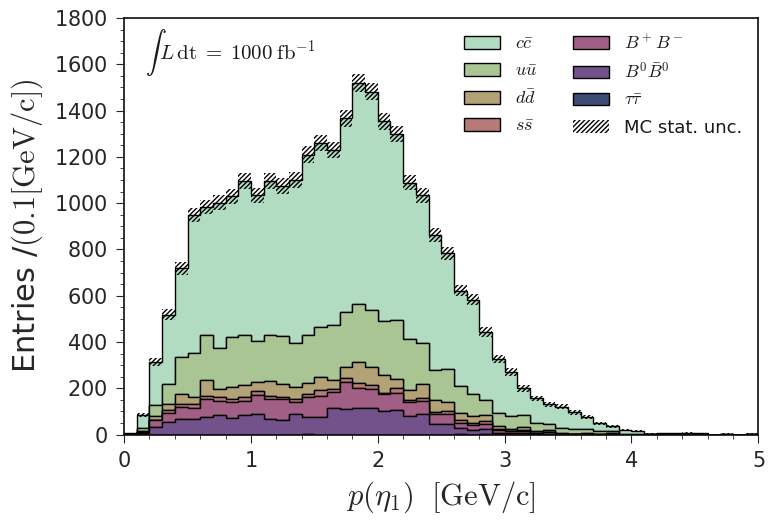

In [155]:
var = 'Eta_1_p'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0,5)
nbins = 50
xlabel = "$p(\eta_1)$ "

img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tag_pre_sel_Eta1p_step2.png"
# img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tight_selv0_sel_D0M.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path,unit="[\mathrm{GeV/c}] ")

[   5.  148.  441.  801. 1063. 1346. 1416. 1345. 1407. 1316. 1260. 1162.
 1063.  982.  904.  907.  971.  936.  977.  914.  892.  859.  940.  826.
  822.  825.  731.  670.  549.  508.  329.  315.  250.  212.  137.  123.
   82.   70.   38.   33.   21.   16.   18.    5.   15.    9.    2.    2.
    0.    2.]
fitst_bin_entries=5.0


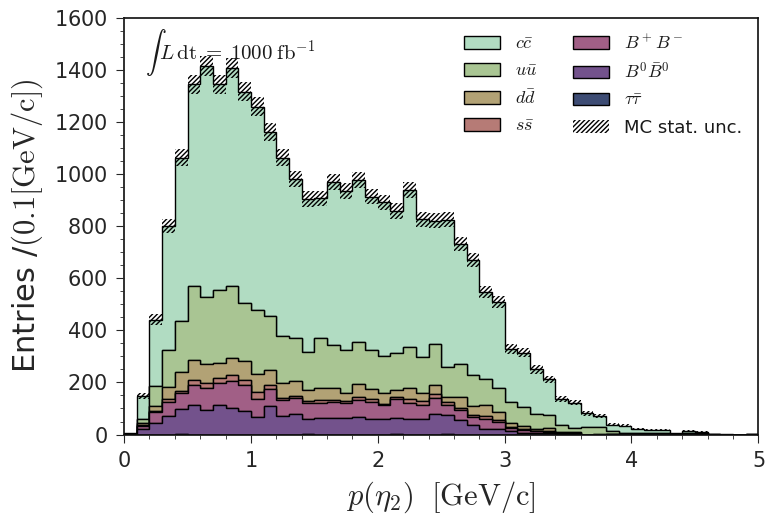

In [156]:
var = 'Eta_2_p'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0,5)
nbins = 50
xlabel = "$p(\eta_2)$ "

img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tag_pre_sel_Eta1p_step2.png"
# img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tight_selv0_sel_D0M.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path,unit="[\mathrm{GeV/c}] ")